In [1]:
# import base map
!pip install basemap

In [2]:
# importing libraries 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('summer')
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MinMaxScaler

In [3]:
df =  pd.read_csv("data.csv")

In [4]:
df.head()

,date,time,latitude,longitude,depth,magnitude
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41


In [5]:
df.describe()

,latitude,longitude,depth,magnitude
count,87372.000000,87372.000000,87372.000000,87372.000000
mean,-3.415577,119.213764,48.498258,3.555979
std,4.342191,10.649071,76.486725,0.794365
min,-11.000000,95.002390,1.000000,1.000000
25%,-7.930000,114.007420,10.000000,2.980000
50%,-2.900000,121.187475,15.400000,3.500000
75%,0.110000,126.845377,52.200000,4.120000
max,6.000000,140.981520,750.000000,7.920000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       87372 non-null  object 
 1   time       87372 non-null  object 
 2   latitude   87372 non-null  float64
 3   longitude  87372 non-null  float64
 4   depth      87372 non-null  float64
 5   magnitude  87372 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


In [7]:
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour + 1
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

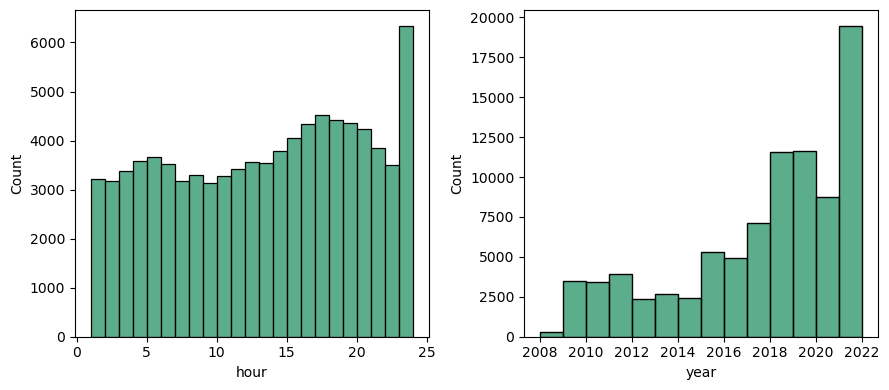

In [8]:
fig = plt.figure(figsize=(9,4), tight_layout=True)
for i, data in enumerate([df['hour'], df['year']]):
    ax = plt.subplot(1,2, i + 1)
    sns.histplot(data, bins=np.unique(data))

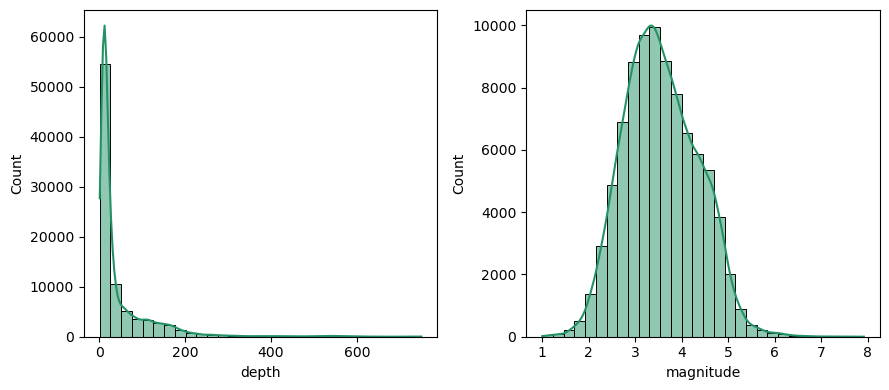

In [9]:
fig = plt.figure(figsize=(9,4), tight_layout=True)

for i, data in enumerate([df['depth'], df['magnitude']]):
    bins = 9 if i == 2 else 30
    ax = plt.subplot(1,2, i + 1)
    sns.histplot(data, bins=bins, kde=True)

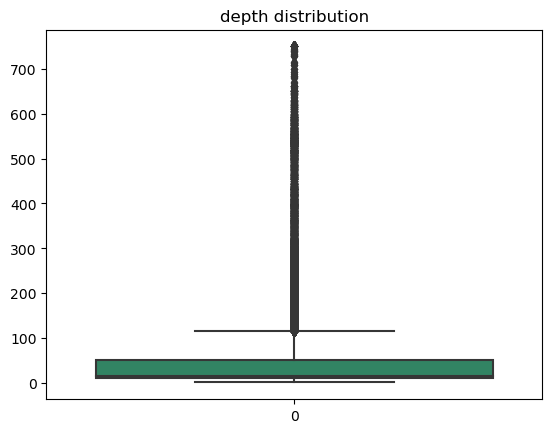

In [10]:
sns.boxplot(data=df['depth'])
plt.title('depth distribution')
plt.show()

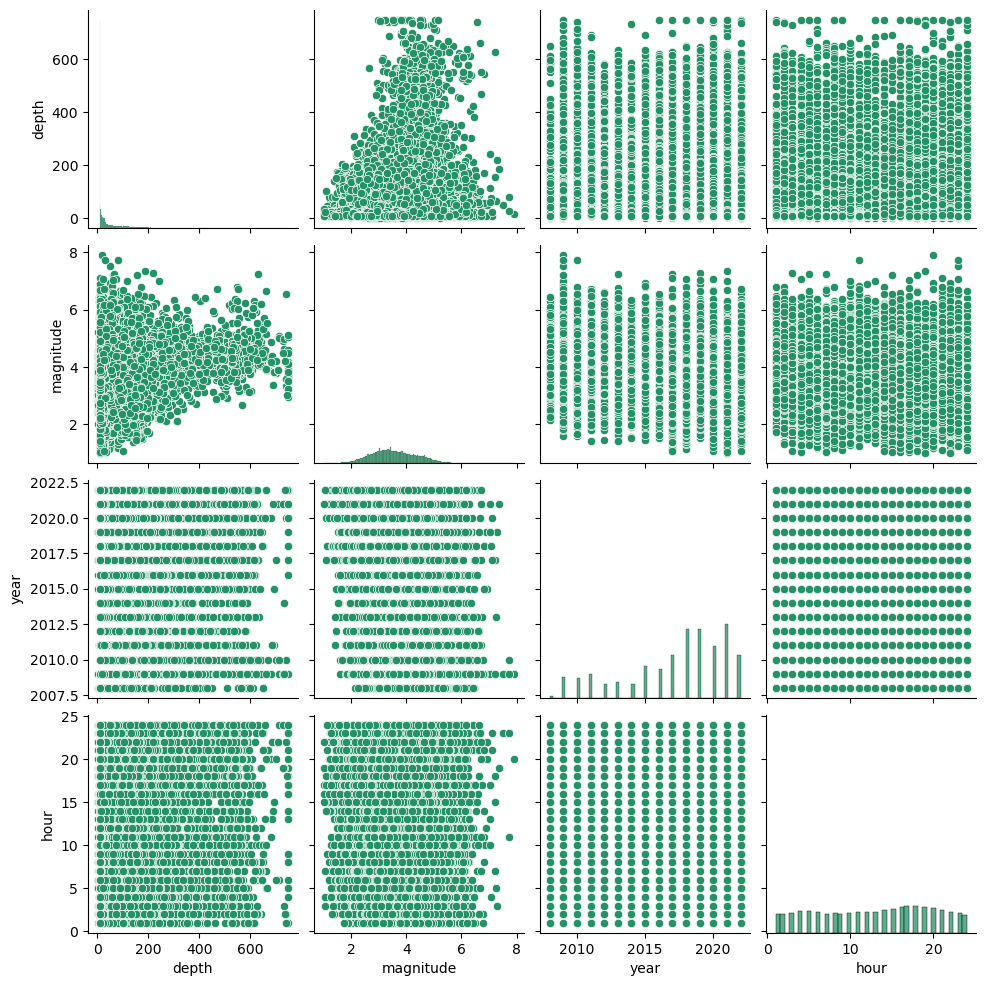

In [11]:
sns.pairplot(df[['depth', 'magnitude', 'year', 'hour']]); plt.show()

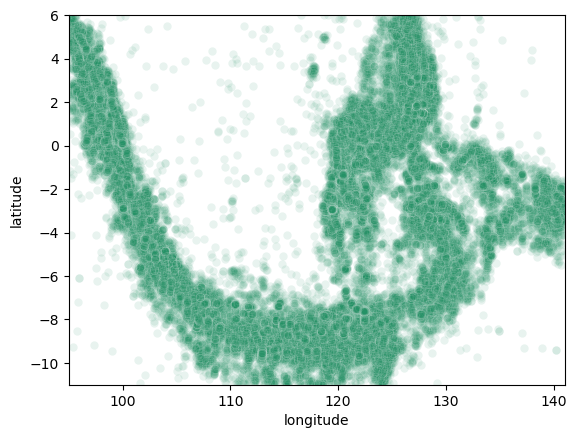

In [12]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], alpha=0.1)
plt.axis([95, 141, -11, 6])
plt.show()

In [13]:
def background_map():
    plt.figure(figsize=(12,6))
    m = Basemap(projection='lcc', resolution=None,width=6E6, height=4E6, lat_0=-2, lon_0=120)
    m.shadedrelief(scale=0.5)
    return m

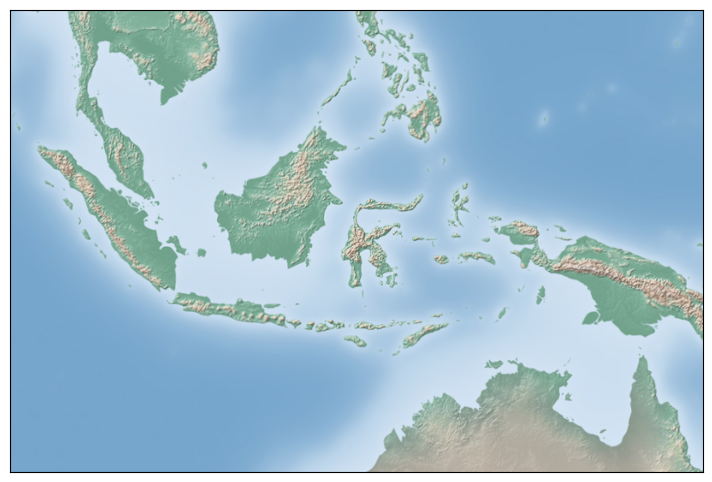

In [14]:
 m = background_map()

Text(0.5, 1.0, '2008 - 2022 Indonesia Earthquake')

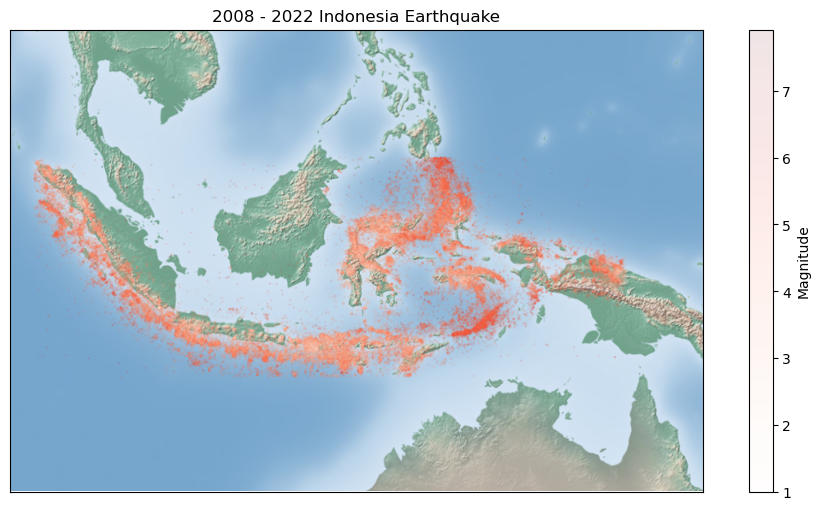

In [15]:
m = background_map()
m.scatter(df['longitude'], df['latitude'], s=0.5 , c=df['magnitude'], cmap='Reds', latlon=True, alpha=0.1)
plt.colorbar(label='Magnitude')
plt.title('2008 - 2022 Indonesia Earthquake')

In [16]:
from sklearn.cluster import KMeans

km_clf = KMeans(4)
km_clf.fit(df[['latitude', 'longitude']])

C:\Users\Cheelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

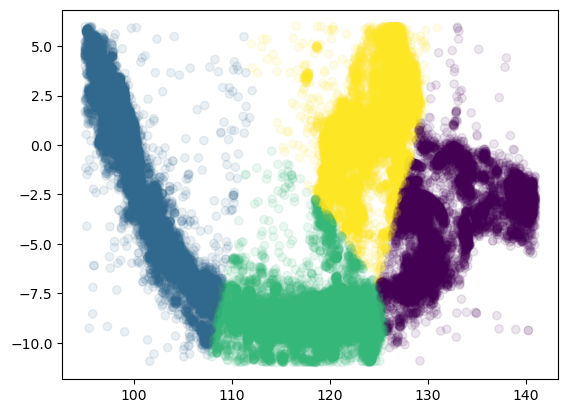

In [17]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.1, c=km_clf.labels_)

In [18]:
df['zone'] = km_clf.labels_

In [19]:
df['round_magnitude'] = df['magnitude'].astype(np.uint8)

In [20]:
np.array([0, 1,2,3,4,5,6,7,8]) // 2

array([0, 0, 1, 1, 2, 2, 3, 3, 4], dtype=int32)

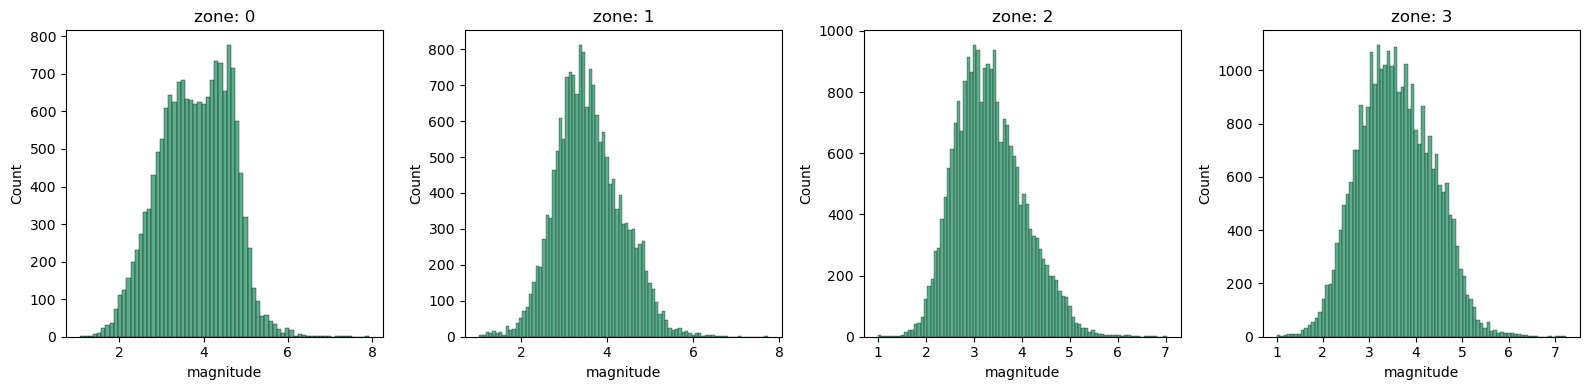

In [25]:
fig = plt.figure(figsize=(16,4), tight_layout=True)

for i in range(4):
    ax = plt.subplot(1,4, i + 1)
    zone  = df[df['zone'] == i]
    sns.histplot(zone['magnitude'], ax=ax)
    ax.set_title('zone: {}'.format(i))
plt.show()

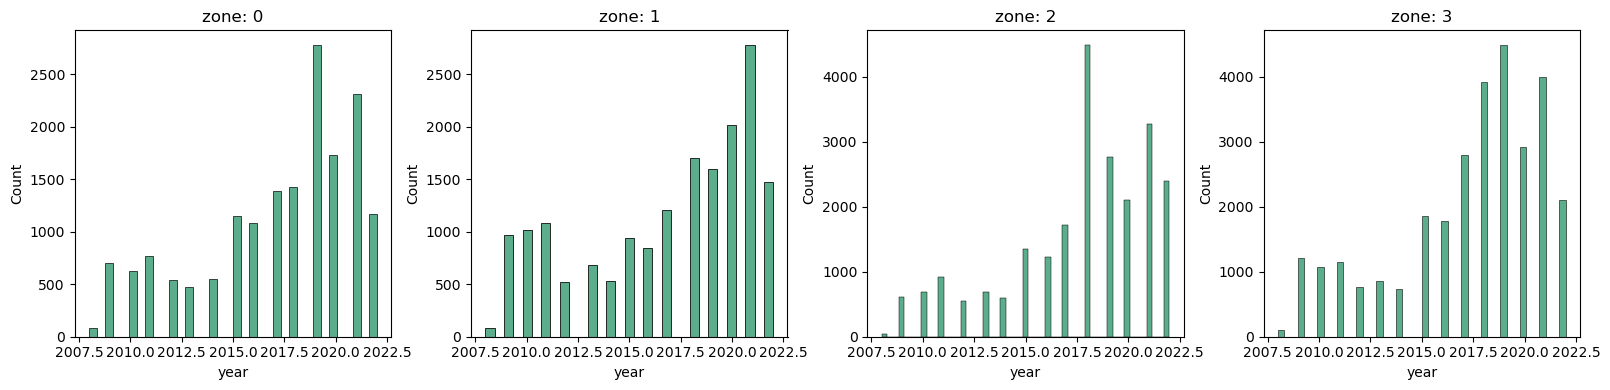

In [22]:
fig = plt.figure(figsize=(16,4), tight_layout=True)

for i in range(4):
    ax = plt.subplot(1,4, i + 1)
    zone  = df[df['zone'] == i]
    sns.histplot(zone['year'].round(0), ax=ax)
    ax.set_title('zone: {}'.format(i))
plt.show()

In [23]:
year = 2022 - 2014
for i in range(4):
    zone  = df[df['zone'] == i]
    print("Total earthquake per year in zone {}: ".format(i), np.round(zone.shape[0] / year, 2))

Total earthquake per year in zone 0:  2098.0
Total earthquake per year in zone 1:  2180.75
Total earthquake per year in zone 2:  2924.62
Total earthquake per year in zone 3:  3718.12
